In [70]:
### 1. Install Dependencies and Setup

In [ ]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
### 2 Data Collection

In [3]:
###2.1. Defines training directory paths

In [ ]:
#define the path to the training and test directories
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [5]:
### 2.2 Label Mapping for Emotion Dataset

In [ ]:
#Create dataframe for training and test data
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [7]:
### 2.3 Stores the data in a DataFrame

In [8]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
image completed
label completed
neutral completed
sad completed
surprise completed


In [9]:
print(train)

                                      image  label
0                  images/train\angry\0.jpg  angry
1                  images/train\angry\1.jpg  angry
2                 images/train\angry\10.jpg  angry
3              images/train\angry\10002.jpg  angry
4              images/train\angry\10016.jpg  angry
...                                     ...    ...
21779            images/train\sad\17136.jpg    sad
21780            images/train\sad\17143.jpg    sad
21781             images/train\sad\1715.jpg    sad
21782            images/train\sad\17151.jpg    sad
21783  images/train\sad\Gautam_Saraswat.png    sad

[21784 rows x 2 columns]


In [10]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
image completed
label completed
neutral completed
sad completed
surprise completed


In [11]:
print(test)
print(test['image'])

                                     image  label
0                  images/test\angry\0.jpg  angry
1                  images/test\angry\1.jpg  angry
2                 images/test\angry\10.jpg  angry
3              images/test\angry\10002.jpg  angry
4              images/test\angry\10016.jpg  angry
...                                    ...    ...
21779            images/test\sad\17136.jpg    sad
21780            images/test\sad\17143.jpg    sad
21781             images/test\sad\1715.jpg    sad
21782            images/test\sad\17151.jpg    sad
21783  images/test\sad\Gautam_Saraswat.png    sad

[21784 rows x 2 columns]
0                    images/test\angry\0.jpg
1                    images/test\angry\1.jpg
2                   images/test\angry\10.jpg
3                images/test\angry\10002.jpg
4                images/test\angry\10016.jpg
                        ...                 
21779              images/test\sad\17136.jpg
21780              images/test\sad\17143.jpg
21781         

In [12]:
### 3. Grayscale Image Feature Extraction and Label Encoding for Emotion Classification

In [13]:
### 3.1 Extract Features

In [14]:
from tqdm.notebook import tqdm

In [15]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image_path in tqdm(images):
        img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
        img = img_to_array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [16]:
train_features = extract_features(train['image']) 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 21784/21784 [01:14<00:00, 294.17it/s]


In [17]:
test_features = extract_features(test['image'])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 21784/21784 [01:17<00:00, 279.49it/s]


In [18]:
### 3.2 Normalize Pixel Values

In [19]:
x_train = train_features/255.0
x_test = test_features/255.0

In [20]:
### 3.3 Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [23]:
### 4. Label Transformation and Custom CNN Design

In [24]:
### 4.1 Label Encoding to Numeric

In [25]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [26]:
### 4.2 One-Hot Encoding

In [27]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [28]:
### 5.Model Architecture (Keras Sequential Model)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Input + Conv Block 1
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Conv Block 2
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Conv Block 3
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Conv Block 4
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer - for 7-class classification
model.add(Dense(7, activation='softmax'))

D:\Samapti\Projects\face_imotion\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
### 6. Train

In [31]:
### 6.1.  Callback Configuration, ReduceLROnPlateau & ModelCheckpoint

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Early Stopping — stop training if val_total_loss doesn't improve
early_stop = EarlyStopping(
    monitor='val_total_loss',
    patience=5,
    restore_best_weights=True,
    mode='min'
)

# Reduce LR on Plateau — lower learning rate if val_total_loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_total_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1,
    mode='min'
)

# Checkpoint — save best model weights (only weights)
checkpoint = ModelCheckpoint(
    filepath='Facetracker.weights.h5',
    monitor='val_total_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

callbacks = [early_stop, reduce_lr, checkpoint]

In [33]:
### 6.2.  Model Compilation & Training

In [34]:
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']  )

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary for verification
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
### 6.2. Model Training Execution

In [36]:
# hist = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

hist = model.fit(x=x_train,y=y_train,validation_data=(x_test, y_test), batch_size=128,epochs=100,callbacks=[early_stop, reduce_lr])


Epoch 1/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 477s 3s/step - accuracy: 0.2952 - loss: 1.6198 - val_accuracy: 0.3289 - val_loss: 1.5632 - learning_rate: 0.0010
Epoch 2/100


D:\Samapti\Projects\face_imotion\.venv\lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_total_loss` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
D:\Samapti\Projects\face_imotion\.venv\lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_total_loss` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 482s 3s/step - accuracy: 0.3226 - loss: 1.5751 - val_accuracy: 0.3289 - val_loss: 1.5591 - learning_rate: 0.0010
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 438s 3s/step - accuracy: 0.3303 - loss: 1.5572 - val_accuracy: 0.3361 - val_loss: 1.5275 - learning_rate: 0.0010
Epoch 4/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 458s 3s/step - accuracy: 0.3444 - loss: 1.5323 - val_accuracy: 0.3887 - val_loss: 1.4781 - learning_rate: 0.0010
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.4041 - loss: 1.4646 - val_accuracy: 0.5050 - val_loss: 1.3037 - learning_rate: 0.0010
Epoch 6/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.4739 - loss: 1.3358 - val_accuracy: 0.5424 - val_loss: 1.1885 - learning_rate: 0.0010
Epoch 7/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.4974 - loss: 1.2895 - val_accuracy: 0.5614 - val_loss: 1.1866 - learning_rate: 0.0010
Epoch 8/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.5143 - loss: 1.2507 

In [37]:
hist.history

{'accuracy': [0.31449687480926514,
  0.3267535865306854,
  0.33180317282676697,
  0.3480077087879181,
  0.4263220727443695,
  0.4833363890647888,
  0.5039937496185303,
  0.5193719863891602,
  0.5386063456535339,
  0.5473282933235168,
  0.5542600154876709,
  0.5672053098678589,
  0.573999285697937,
  0.573356568813324,
  0.5896070599555969,
  0.5941975712776184,
  0.6050311923027039,
  0.6030572652816772,
  0.6073724031448364,
  0.6193077564239502,
  0.621419370174408,
  0.6202258467674255,
  0.631518542766571,
  0.6296364068984985,
  0.6309676766395569,
  0.6434997916221619,
  0.6413881778717041,
  0.643775224685669,
  0.6551138162612915,
  0.6567205190658569,
  0.660071611404419,
  0.6566287279129028,
  0.6625046133995056,
  0.6631472706794739,
  0.6679673194885254,
  0.669528067111969,
  0.672879159450531,
  0.6777451634407043,
  0.6783419251441956,
  0.6833455562591553,
  0.6851817965507507,
  0.6906903982162476,
  0.6918380260467529,
  0.6945464611053467,
  0.695694088935852,
  0.6

In [38]:
print(hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


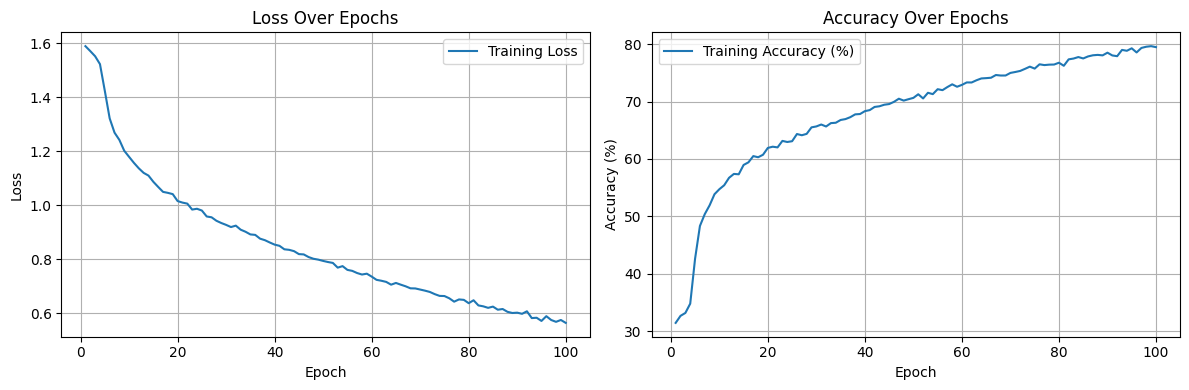

In [39]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
accuracy = hist.history['accuracy']

epochs = range(1, len(loss) + 1)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Loss
axs[0].plot(epochs, loss, label='Training Loss')
axs[0].set_title('Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot Accuracy
axs[1].plot(epochs, [a * 100 for a in accuracy], label='Training Accuracy (%)')
axs[1].set_title('Accuracy Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [40]:
train_acc = hist.history['accuracy'][-1] * 100
print(f"Final Training Accuracy: {train_acc:.2f}%")


Final Training Accuracy: 79.48%


In [41]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [42]:
from keras.models import model_from_json

In [43]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [44]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [45]:
# def ef(image):
#     img = load_img(image,grayscale =  True )
#     feature = np.array(img)
#     feature = feature.reshape(1,48,48,1)
#     return feature/255.0


from keras.preprocessing.image import load_img, img_to_array
import numpy as np

def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature


In [46]:
image = 'images/train/sad/104.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
model prediction is  neutral


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
model prediction is  angry


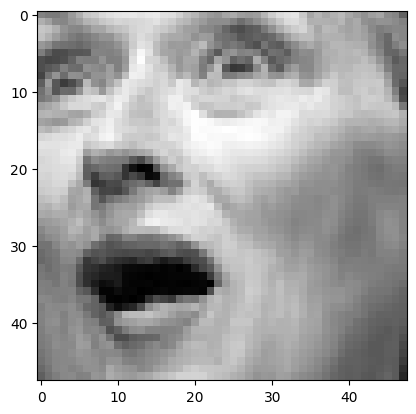

In [48]:
image = 'images/train/sad/1005.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
model prediction is  neutral


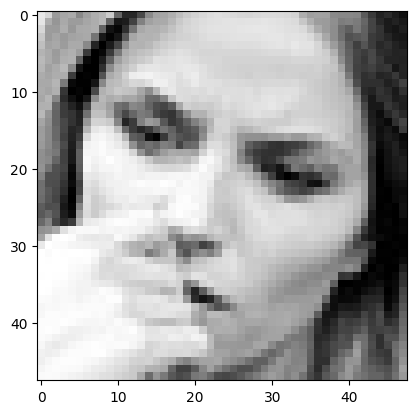

In [49]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
model prediction is  angry


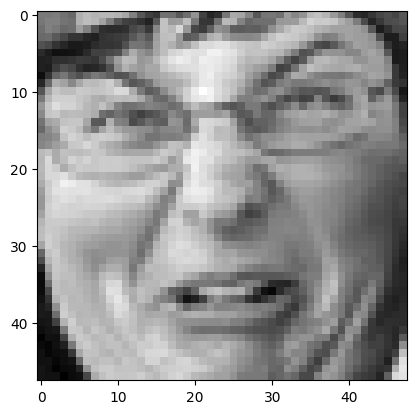

In [50]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
model prediction is  happy


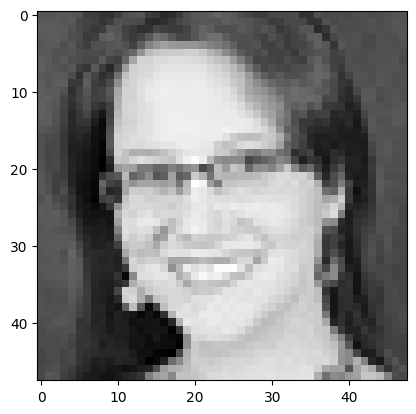

In [51]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')